# Assignment 2 - Niels August Davidsen (phx657)

### *Hand-in monday 22/09/2025*

_____

Loading of data and test matrices is done in the cell below. When correcting this assignment, please be aware of the path to "Cladni-Kmat.npy" as I have it in a subdirectory. Changing the varaible TA to True in the cell below should fix this.

In [1]:
### For TA change TA = True for simple path ###
TA = False


# Used libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import chladni_show

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['mathtext.fontset'] = 'cm'



# Loading of Chladni matrix
if not TA:
    path = "/Users/nielsaugustdavidsen/Documents/GitHub/Scientific_Computing_2025/Assignments/Assignment_2/Chladni-Kmat.npy"
else:
    path = "Chladni-Kmat.npy"
kmat = np.load(path)


# Test matrices and their eigenvalues
# A1-A3 should work with any implementation
A1   = np.array([[1,3],[3,1]]);
eigvals1 = [4,-2];

A2   = np.array([[3,1],[1,3]]);
eigvals2 = [4,2];

A3   = np.array([[1,2,3],[4,3.141592653589793,6],[7,8,2.718281828459045]])
eigvals3 = [12.298958390970709, -4.4805737703355,  -0.9585101385863923];

# A4-A5 require the method to be robust for singular matrices 
A4   = np.array([[1,2,3],[4,5,6],[7,8,9]]);
eigvals4 = [16.1168439698070429897759172023, -1.11684396980704298977591720233, 0]


A5   = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]]);
eigvals5 = [68.6420807370024007587203237318, -3.64208073700240075872032373182, 0, 0, 0];

# A6 has eigenvalue with multiplicity and is singular
A6  = np.array(
    [[1.962138439537238,0.03219117137713706,0.083862817159563,-0.155700691654753,0.0707033370776169],
       [0.03219117137713706, 0.8407278248542023, 0.689810816078236, 0.23401692081963357, -0.6655765501236198],
       [0.0838628171595628, 0.689810816078236,   1.3024568091833602, 0.2765334214968566, 0.25051808693319155], 
       [-0.1557006916547532, 0.23401692081963357, 0.2765334214968566, 1.3505754332321778, 0.3451234157557794],
       [0.07070333707761689, -0.6655765501236198, 0.25051808693319155, 0.3451234157557794, 1.5441014931930226]]);
eigvals6 = [2,2,2,1,0]



## *A(1) + A(2)*

In [2]:
# Gershgorin function

def gershgorin(A):

    A = A.copy()
    n = A.shape[0]
    m = A.shape[1]
    assert n == m, "Matrix must be square"

    centers = np.diag(A)
    radii = np.zeros(n)

    for i in range(n):
        radii[i] = np.sum(np.abs(A[i,:])) - np.abs(A[i,i])

    return centers, radii

In [3]:
# Applying Gershgorin to Chladni matrix and comparing with np.linalg.eigvals

c_kmat, r_kmat = gershgorin(kmat)
numpy_eig = np.linalg.eigvals(kmat)


# Checking if all true Eigenvalues are within the radii
tf_array = np.array([eig - c_kmat <= r_kmat for eig in numpy_eig])
in_gershgorin = np.any(tf_array, axis=1)
print(f"All numpy linalg eigenvalues are within Gershgorin circles: {np.all(in_gershgorin)}")
    

cr_df = pd.DataFrame({
    "Centers": c_kmat,
    "Radii": r_kmat,
    "NumPy Eigenvalues": [f"{eig:.2f}" for eig in numpy_eig]
})
display(cr_df)

All numpy linalg eigenvalues are within Gershgorin circles: True


,Centers,Radii,NumPy Eigenvalues
0,129292.219206,42231.646726,151362.67
1,103041.439420,56927.518940,93999.61
2,64967.578727,31160.670887,52766.29
3,43612.411909,18532.348737,50430.03
4,36273.751516,7870.516137,36152.37
5,37990.099373,17854.702613,32779.07
6,24166.971120,15414.716667,22590.20
7,11651.158690,2512.041395,13338.62
8,13865.080461,5502.969527,11485.21
9,5600.547665,1195.283294,5560.88


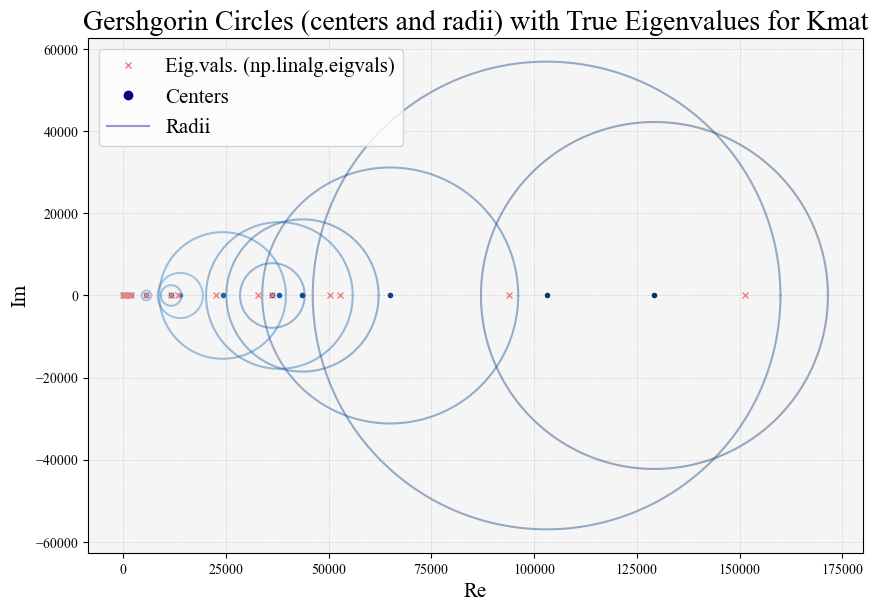

In [4]:
# Plot of Gershgorin circles

colors = plt.cm.Blues(np.linspace(0.5, 1, len(c_kmat)))
colors = colors[::-1]

fig, axi = plt.subplots(figsize=(10, 10), dpi=100)

theta = np.linspace(0, 2*np.pi, 1000)
for i in range(len(c_kmat)):
    x = c_kmat[i] + r_kmat[i]*np.cos(theta)
    y = 0 + r_kmat[i]*np.sin(theta)
    axi.plot(x, y, '-', color=colors[i], alpha=0.4)
    axi.plot(c_kmat[i], 0, marker='o', color=colors[i],markersize=3)
axi.plot(numpy_eig.real, numpy_eig.imag, 'x', color='lightcoral', markersize=4, label='Eig.vals. (np.linalg.eigvals)')
# Add centers to legend


axi.plot([], [], 'o', color='darkblue', label='Centers')
axi.plot([], [], '-', color='darkblue', label='Radii', alpha=0.4)
axi.grid(linestyle='--', alpha=1, color='lightgrey', linewidth=0.5)
axi.set_facecolor('whitesmoke')
axi.legend(fontsize=15)

axi.set_title("Gershgorin Circles (centers and radii) with True Eigenvalues for Kmat", fontsize=20)
axi.set_xlabel("Re", fontsize=15)
axi.set_ylabel("Im", fontsize=15)
axi.set_aspect('equal')


plt.show()



## B(1) + B(2)

In [5]:
# Rayleigh Quotient function
def rayleigh_qt(A, x):
    A = A.copy()
    x = x.copy()

    n, m = A.shape
    assert n == m, "Matrix must be square"

    lam = (x.T @ A @ x) / (x.T @ x)
    return lam


# Power Iteration function
def power_iterate(A, x0, tol=1e-5, n_max=1e6):
    x0 = x0.astype(float).copy()

    n, m = A.shape
    assert n == m, "Matrix must be square"

    x0 = x0 / np.max(np.abs(x0))
    n = 0

    while n < n_max:
        y = A @ x0
        y = y / np.max(np.abs(y))
        if np.max(np.abs(y - x0)) < tol:
            return y,  n
        if n == n_max - 1:
            print("Warning: Maximum number of iterations reached without convergence")
            return y, n
        x0 = y
        n += 1
    return y, n


# Rayleigh Residual
def rayleigh_res(A, x, lam):
    A = A.copy()
    x = x.copy()
    res = np.linalg.norm(A @ x - lam * x, ord=2)
    return res




## B(3)

In [6]:
def max_eig_test(A):
    x0 = np.random.rand(A.shape[0])
    y, n_iter = power_iterate(A, x0)
    lam = rayleigh_qt(A, y)
    res = rayleigh_res(A, y, lam)
    return lam, res, y, n_iter

In [7]:
# Test on A1-A6
eig_df = pd.DataFrame(columns=["Matrix", "Computed Eigval", "True Eigval", "Residual", "Iterations"])
for i, (A, true_eig) in enumerate(zip([A1, A2, A3, A4, A5, A6], [eigvals1, eigvals2, eigvals3, eigvals4, eigvals5, eigvals6])):
    lam, res, y, n_iter = max_eig_test(A)
    eig_df.loc[i] = [f"A{i+1}", lam, true_eig[0], res, n_iter]

display(eig_df.style.hide(axis="index"))

Matrix,Computed Eigval,True Eigval,Residual,Iterations
A1,4.000000,4.000000,0.000018,17
A2,4.000000,4.000000,0.000009,15
A3,12.298962,12.298958,0.000020,11
A4,16.116845,16.116844,0.000003,4
A5,68.642077,68.642081,0.000014,4
A6,2.000000,2.000000,0.000007,14


## B(4)

In [8]:
lam_k, res_k, y_k, n_iter_k = max_eig_test(kmat)
print(f"Approximated largest eigenvalue of Chladni matrix: {lam_k} \nTrue largest eigenvalue from np.linalg.eigvals: {np.max(numpy_eig)}")
print(f"\nDifference: {abs(lam_k - np.max(numpy_eig))}")


Approximated largest eigenvalue of Chladni matrix: 151362.65797810722 
True largest eigenvalue from np.linalg.eigvals: 151362.666488008

Difference: 0.008509900770150125


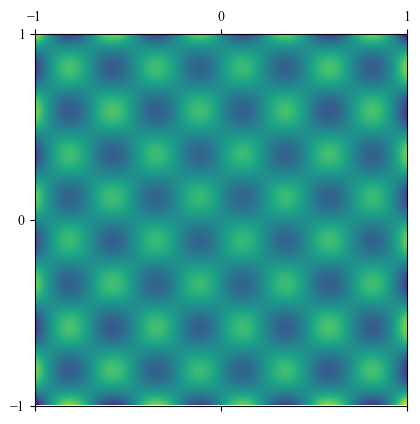

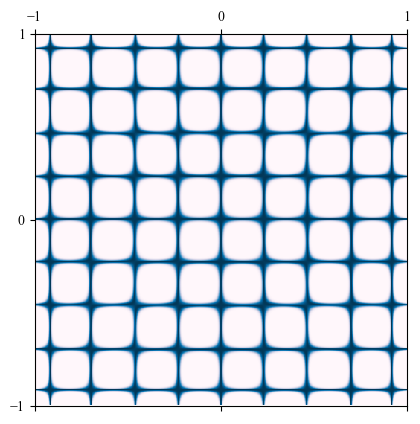

In [9]:
chladni_show.show_waves(y_k)
chladni_show.show_nodes(y_k)

The plot of the nodes correctly shows the 8x8 grid pattern 

____

## C(1)

In [10]:
# Implemeting functions from last assignment 
# (back_substitution, householder_fast and least_sqares)

def backward_substitute(U, y, tol=1e-12):
    """
    Solve U x = y for x, where U is an upper triangular matrix.


    Parameters:
    -----------
    U: Upper triangular Matrix (ndarray) of size NxN 
            Reduced matrix on upper triangular form describing linear the equation system


    y: Vector (ndarray) of size N
            Used for finding solution x for the system Ux = y using backward substitution

    
    Returns:
    --------
    x: Vector (ndarray) of size N
            Solution of the equation system defined by U and y

    """
    x = y.copy()
    n = U.shape[0]

    for j in range(n - 1, -1, -1):
        if np.abs(U[j, j]) < tol:
            x[j] = 0
        else:
            x[j] = x[j] / U[j,j]
            for i in range(j):
                x[i] = x[i] - U[i,j] * x[j]

    return x


def householder_fast(A):
    A = A.astype(float).copy()
    m, n = A.shape
    VR = np.zeros((m + 1, n))


    for k in range(min(m, n)):
        
        # Constructing Householder vector 
        u_k = A[k:, k]
        alpha = -np.copysign(np.linalg.norm(u_k), A[k,k])
        e_k = np.zeros_like(u_k)
        e_k[0] = 1.0
        v_k = u_k - alpha * e_k

        b_k = v_k.T @ v_k
        if b_k == 0:
            VR[k, k:] = A[k, k:]
            continue
        
        
        # Updating all rows with the householder vector 
        for j in range(k, n):
            y_j = v_k @ A[k:, j]
            A[k:, j] -= 2 * v_k * y_j / b_k

        VR[k, k:] = A[k, k:]
        VR[k+1: k+1 + len(v_k), k] = v_k

    return VR


def least_squares(A, b):
    VR = householder_fast(A)
    y, R = H_b(b, VR)
    y1 = y[:A.shape[1]]
    x = backward_substitute(R, y1)

    r = b - A @ x
    r_norm = np.linalg.norm(r)
    return x, r_norm, r


def H_b(b, VR):
    m_p1, n = VR.shape
    m = m_p1 - 1
    y = b.astype(float).copy()

    for k in range(min(m_p1, n)):
        # Extract full Householder vector from VR
        v_k = VR[k+1:k+1+(m-k), k]
        if np.allclose(v_k, 0):
            continue
        
        b_k = v_k.T @ v_k
        tau = v_k @ y[k:]
        y[k:] -= 2 * tau / b_k * v_k

    # Extracting R part from VR
    R = np.zeros((n, n))
    for i in range(n):
        R[i, i:] = VR[i, i:]
    return y, R


In [11]:
def rayleigh_iterate(A, x0, shift0, n_max, tol=1e-6, eps=1e-12):
    
    A = A.copy()
    n, m = A.shape
    x0 = x0.copy()
    shift0 = float(shift0)
    assert n == m, "Matrix must be square"

    x0 = x0 / np.max(np.abs(x0))
    n = 0

    while n < n_max:
        if n == 0:
            lam = shift0
        else: 
            lam = rayleigh_qt(A, x0)
        n += 1

        A_shift = A - lam * np.eye(m)
        
        y = least_squares(A_shift + eps * np.eye(m), x0)[0]
        y = y / np.max(np.abs(y))

        if np.linalg.norm(A @ y - lam * y) < tol:
            lam = rayleigh_qt(A, y)
            return y, lam, n
        if n == n_max - 1:
            print("Warning: Maximum number of iterations reached without convergence")
            return y, lam, n
        x0 = y

    return y, lam, n



## C(2)

As some of the matrices are singular, i have implemented a very small $\epsilon=10^{-12}$ which i use on matrix $A$ to actually have my Rayleigh Iteration converge towards the correct eigenvalues. It is used when solving for 

$$
    y = \text{least\_squares} (A - \lambda I + \epsilon I)
$$

See function above for clarification

In [12]:
# Test on A1-A6
tol = 1e-6
eig_results = []

eig_df = pd.DataFrame(columns=["Matrix", "Computed Eigval", "True Eigval", "Residual", "Iterations"])
for i, (A, true_eig) in enumerate(zip([A1, A2, A3, A4, A5, A6], [eigvals1, eigvals2, eigvals3, eigvals4, eigvals5, eigvals6])):
    found_eigs = []
    x0 = np.random.rand(A.shape[0])
    c_A, r_A = gershgorin(A)

    eig_guess = np.random.uniform(min(c_A)-r_A[np.argmin(c_A)], max(c_A) + r_A[np.argmax(c_A)], 500)
    for c in eig_guess:
        y, lam, n_iter = rayleigh_iterate(A, x0, c, n_max=10_000)
        res = rayleigh_res(A, y, lam)

        # check if lam is already found
        if not any(abs(lam - ev) < tol for ev in found_eigs):
            found_eigs.append(lam)

            # match to closest true eigenvalue
            closest = min(true_eig, key=lambda ev: abs(ev - lam))
            eig_results.append({
                "Matrix": f"A{i+1}",
                "Computed Eigval": lam,
                "Matched True Eigval": closest,
                "Ray. Residual": res,
                "Iterations": n_iter
            })


df_eig_results = pd.DataFrame(eig_results)
display(df_eig_results.style.hide(axis="index"))

n_found_eig = len(df_eig_results)
n_true_eig = sum(len(eig) for eig in [eigvals1, eigvals2, eigvals3, eigvals4, eigvals5, eigvals6])
print(f"Number of found eigenvalues: {n_found_eig} out of {n_true_eig} true eigenvalues.")

eig_nf = []
for a, eig_t in enumerate([eigvals1, eigvals2, eigvals3, eigvals4, eigvals5, eigvals6]):
    for et in eig_t:
        if not any(abs(et - ef) < tol for ef in df_eig_results["Computed Eigval"]):
            eig_nf.append((et, f"A{a+1}"))


Matrix,Computed Eigval,Matched True Eigval,Ray. Residual,Iterations
A1,4.000000,4.000000,0.000000,5
A1,-2.000000,-2.000000,0.000000,4
A2,4.000000,4.000000,0.000000,3
A2,2.000000,2.000000,0.000000,3
A3,12.298958,12.298958,0.000000,5
A3,-0.958510,-0.958510,0.000000,6
A3,-4.480574,-4.480574,0.000000,6
A4,16.116844,16.116844,0.000000,5
A4,-1.116844,-1.116844,0.000000,11
A4,0.000000,0.000000,0.000000,7


Number of found eigenvalues: 16 out of 20 true eigenvalues.


The code above finds between 15 and 16 eigenvalues. 4 out of 5 of the missing ones are duplicate eigenvalues from matrices A5 (zeroes) and A6 (twos). Sometimes the algorithm has a bit of trouble converging towarards one additional eigenvalue in some of the matrices, and this is the last missing one. 
I have constructed the test such that the algorithm doesn't report the same eigenvalue twice (hence the missing duplicates), but as it tends to converge towards some specific value, i force it to go through $n=100$ iteration with different starting vectors $x0$ for each shift $\lambda_0$. This makes the convergence towards more than one eigenvalue a lot more probable. This approach is used again in for the Chladni-matrix in question D(1)

The code runs for all  A matrices

## D(1)

The power iteration algorithm only finds the largest eigenvalue of a matrix. This means that not all eigenvalues or -vectors could be calculated from it.

## D(2)

In [13]:
# Finding Kmat eigenvalues

def kmat_eigvals(k_mat, tol, n_trials):
    eig_results = []
    eig_vals_found = []
    vector_storage = []
    c_kmat, r_kmat = gershgorin(k_mat)

    for i, c, in enumerate(c_kmat):
        for _ in range(n_trials):
            x0 = np.random.rand(kmat.shape[0])
            shift0 = c
            y, lam, n_iter = rayleigh_iterate(kmat, x0, shift0, n_max=10_000)
            if any(abs(lam - ev) < tol for ev in eig_vals_found):
                continue
            else:
                eig_vals_found.append(lam)
                res = rayleigh_res(kmat, y, lam)
                eig_results.append({
                    "Computed Eigval": lam,
                    "Ray. Residual": res,
                    "Iterations": n_iter
                })
                vector_storage.append((lam, y))

    kmat_np_eig = np.linalg.eigvals(kmat)
    kmat_eig_df = pd.DataFrame(eig_results)
    kmat_eig_df["Matched True Eigval"] = kmat_eig_df["Computed Eigval"].apply(lambda lam: min(kmat_np_eig, key=lambda ev: abs(ev - lam)))

    return kmat_eig_df, vector_storage


In [14]:
kmat_eig_df, vector_storage = kmat_eigvals(kmat, tol=1e-5, n_trials=100)
kmat_eig_df = kmat_eig_df.reindex(kmat_eig_df["Computed Eigval"].abs().sort_values(ascending=False).index)
display(kmat_eig_df.style.hide(axis="index"))

print(f"Number of found eigenvalues for Kmat: {len(kmat_eig_df)} out of {len(numpy_eig)} true eigenvalues.")

Computed Eigval,Ray. Residual,Iterations,Matched True Eigval
151362.666488,0.000000,7,151362.666488
93999.614129,0.000000,7,93999.614129
52766.288758,0.000000,5,52766.288758
50430.027654,0.000000,7,50430.027654
36152.369975,0.000000,5,36152.369975
32779.071084,0.000000,8,32779.071084
22590.198520,0.000000,9,22590.198520
13338.622299,0.000000,6,13338.622299
11485.212834,0.000000,4,11485.212834
5560.881198,0.000000,4,5560.881198


Number of found eigenvalues for Kmat: 15 out of 15 true eigenvalues.


I found all 15 eigenvalues of the Kmat matrix. This is probably because of the way I constructed my algorithm. I implemented a test such that if one eigenvalue was already found, the Rayleigh Iteration algorithm would run again with the same initial shift (center of Gershgorin circle) but with a new starting vector (x0). This ensured that I got all eigenvalues og the Kmat.

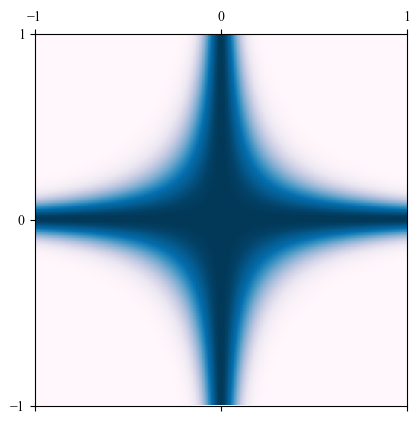

In [15]:
# Smallest eigenvalue of Kmat
vector_storage = sorted(vector_storage, key=lambda item: abs(item[0]))
smallest_eigval, smallest_eigvec = vector_storage[0]

chladni_show.show_nodes(smallest_eigvec)

## D(3)

In [16]:
# Transformation Matrix T
T = np.column_stack([vec for _, vec in vector_storage])
eig_diag = np.diag([lam for lam, vec in vector_storage])

K = T @ eig_diag @ np.linalg.inv(T)

# Test if K is similar to Kmat
print(f"K is similar to Kmat: {np.allclose(K, kmat)}")

K is similar to Kmat: True


## D(4)

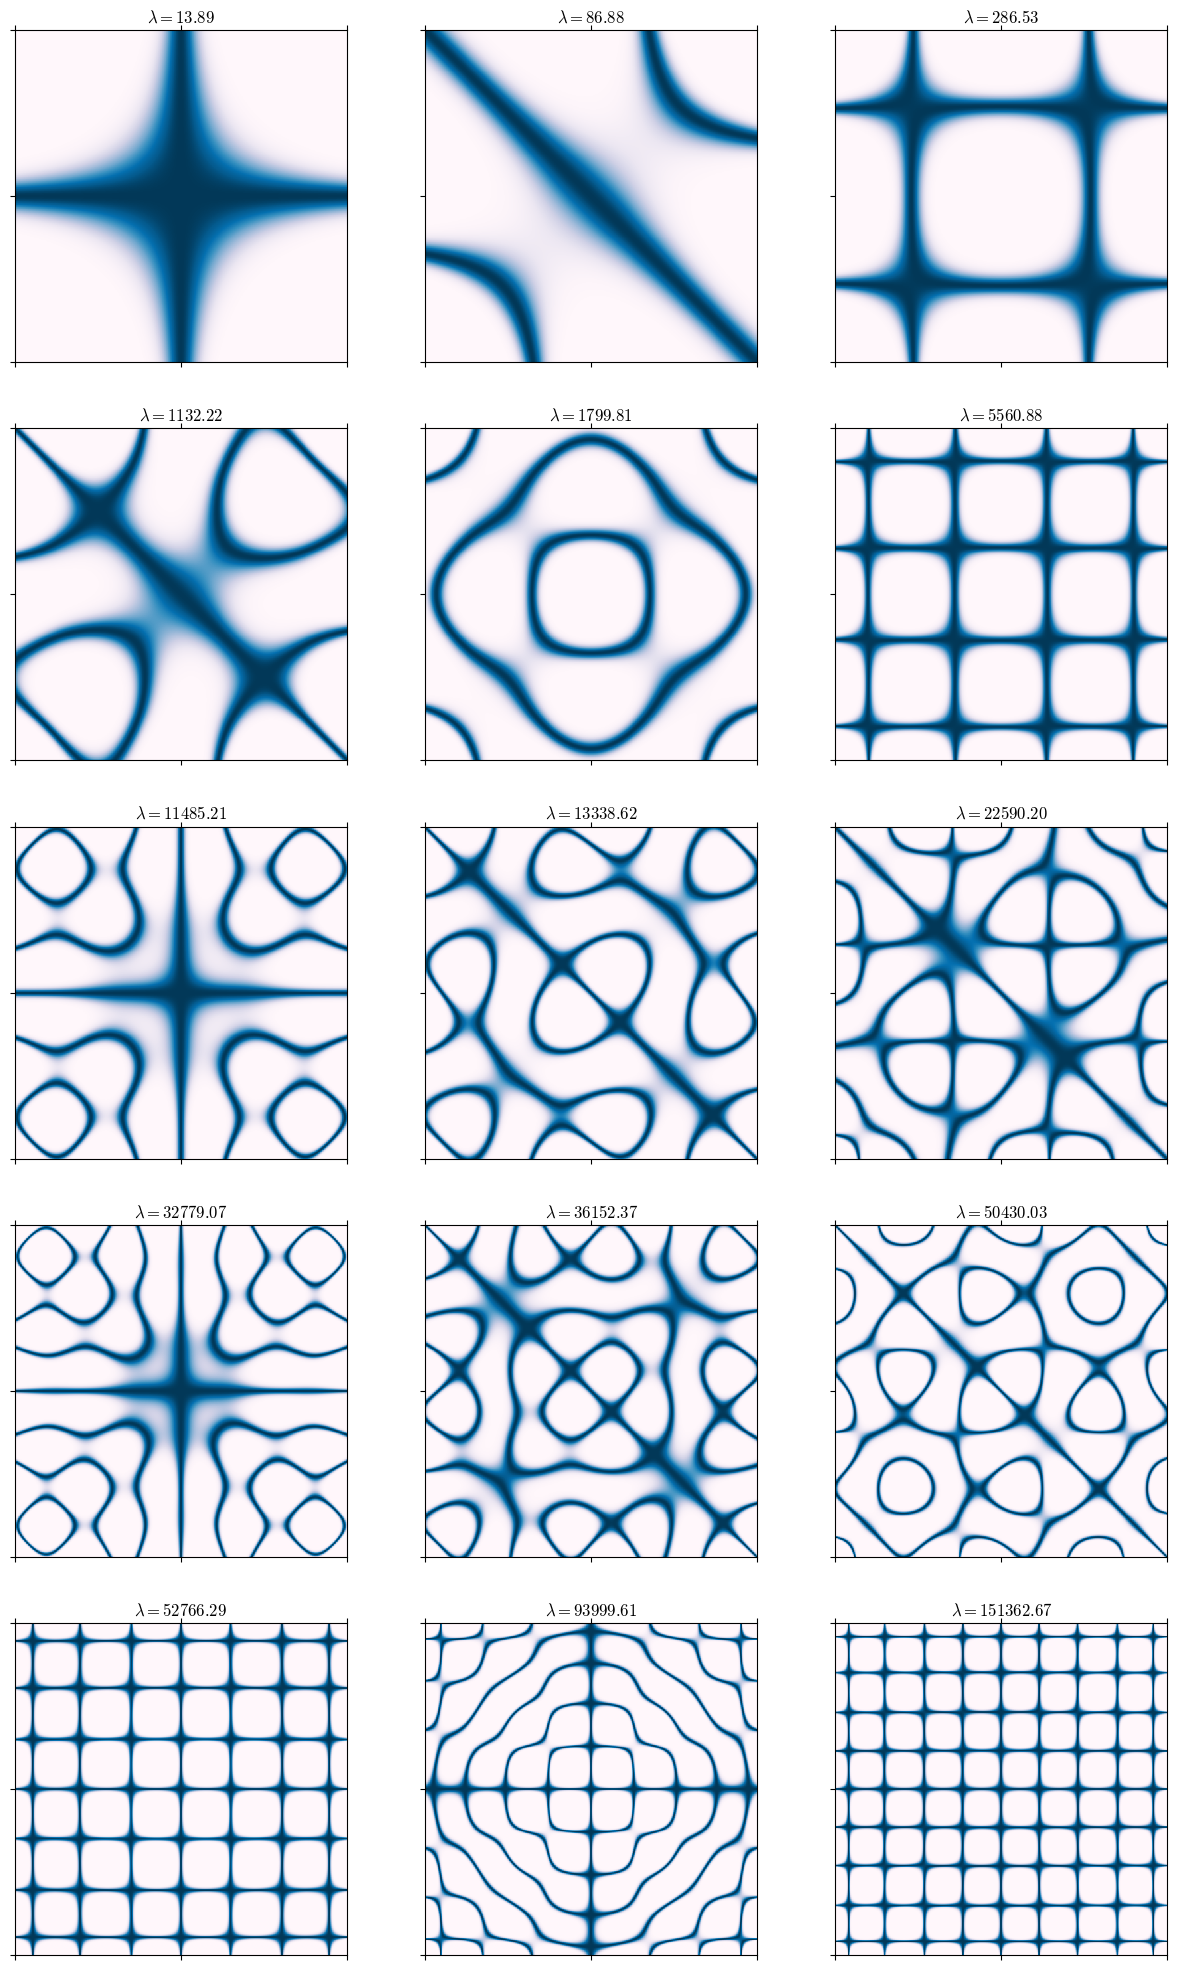

In [17]:
chladni_show.show_all_wavefunction_nodes(T, kmat_eig_df["Computed Eigval"].values[::-1])